# Evrişimli Sinir Ağları (ESA) ile Elma Kalite Tespit ve Sınıflandırılması
# Apple Quality Detection and Classification with Convolutional Neural Networks (CNN)


## Evrişimli Sinir Ağları Uygulama
## Convolutional Neural Network Exercises

### Google Colab'i Google Drive'a bağlama
### Connect Google Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gerekli Kütüphanelerin Import İşlemleri
### Import Operations of Required Libraries

In [ ]:
import os
from pathlib import Path
import shutil
import time
import itertools

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image

# Warningleri kapatmak için kullanılmaktadır.
# It is used to close warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mevcut kümeler yoksa veri kümeleri için yeni klasör oluştur.
# create new folder for datasets if there are no existing clusters.
if not os.path.exists("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good"):
    os.makedirs("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good")
if not os.path.exists("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad"):
    os.makedirs("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad")

# ilgili veri setini bir klasöre 
# move the relevant data set to a folder
move_paths = [
    ['/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/fresh_apple/', '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good'],
    ['/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/rotten_apple', '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad'],
] 

for move_path in move_paths:
    src_path = move_path[0]
    trg_path = move_path[1]
    for src_file in Path(src_path).glob('*.*'):
        shutil.copy(src_file, trg_path)

### Tr

# Bu kodun amacı, belirli klasörlerin varlığını kontrol etmek ve var olmadıkları durumda yeni klasörler oluşturmak, ardından veri setini ilgili klasörlere taşımaktır. İşleyişi şu şekildedir:

# İlk iki satır, "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good" ve "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad" klasörlerinin var olup olmadığını kontrol eder. Eğer bu klasörler yoksa, os.makedirs() fonksiyonuyla bu klasörleri oluşturur.
# "move_paths" adlı bir liste tanımlanır. Bu liste, taşınacak veri setinin kaynak (src) ve hedef (trg) klasör yollarını içerir.
# "move_paths" listesindeki her bir öğe için döngü başlatılır.
# Her bir öğe için kaynak (src) ve hedef (trg) klasör yolları alınır.
# Kaynak klasördeki dosyaların listesini almak için Path(src_path).glob('.') kullanılır.
# Elde edilen dosya listesi üzerinde döngü başlatılır.
# shutil.copy() fonksiyonu kullanılarak kaynak dosyalar, hedef klasöre kopyalanır.
# Bu kodun amacı, "fresh_apple" klasöründeki taze elma görüntüleri için "good" klasörüne, "rotten_apple" klasöründeki çürümüş elma görüntüleri için ise "bad" klasörüne ayrı ayrı taşıma işlemi yapmaktır. Bu işlem, elma kalite tespiti ve sınıflandırma gibi bir uygulamanın veri setinin hazırlanmasında kullanılabilir.


### Eng

# The purpose of this script is to check the existence of certain folders and create new folders in case they don't exist, then move the dataset to the corresponding folders. Here's how it works:

# The first two lines check if the folders "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good" and "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad" exist. If these folders do not exist, it creates them with os.makedirs().
# Define a list called "move_paths". This list contains the source (src) and destination (trg) folder paths of the dataset to be moved.
# For each item in the "move_paths" list the loop is started.
# For each item, the source (src) and destination (trg) folder paths are retrieved.
# Path(src_path).glob('.') is used to get the list of files in the source folder.
# Loop over the resulting list of files.
# shutil.copy() is used to copy the source files to the destination folder.
# The purpose of this code is to move the fresh apple images in the "fresh_apple" folder to the "good" folder and the rotten apple images in the "rotten_apple" folder to the "bad" folder separately. This process can be used to prepare the dataset for an application such as apple quality detection and classification.

In [ ]:
# veri kümesi sayısı
# number of datasets
good_apples = next(os.walk('/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good'))[2]
print('Good Apples: ', len(good_apples))

bad_apples = next(os.walk('/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad'))[2]
print('Bad Apples: ', len(bad_apples))

###Tr

#Bu kod, belirli bir dosya dizininde bulunan iki klasördeki dosya sayılarını hesaplar ve ekrana yazdırır. Bu dosya dizini, elma kalitesi algılama ve sınıflandırma konusunda kullanılan bir veri kümesidir.

#next(os.walk(directory))[2] : os.walk fonksiyonu, belirtilen dizin içindeki tüm klasör ve dosyaları gezinir. [2] ifadesi ise sadece dosyaları listelememizi sağlar. good_apples ve bad_apples adlı değişkenler, "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good" ve "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad" klasörlerindeki dosyaların listesini içerir.
#print('Good Apples: ', len(good_apples)) : good_apples değişkenindeki dosya sayısını ekrana yazdırır.
#print('Bad Apples: ', len(bad_apples)) : bad_apples değişkenindeki dosya sayısını ekrana yazdırır.


### Eng

#This script calculates the number of files in two folders in a given file directory and prints it to the screen. This directory is a dataset used for apple quality detection and classification.

#next(os.walk(directory))[2] : The os.walk function walks through all folders and files in the specified directory. [The variables good_apples and bad_apples contain the list of files in the folders "/content/drive/MyDrive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good" and "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad".
#print('Good Apples: ', len(good_apples)) : prints the number of files in the good_apples variable to the screen.
#print('Bad Apples: ', len(bad_apples)) : prints the number of files in the bad_apples variable.

Good Apples:  1693
Bad Apples:  2342


In [ ]:
# Bölünmüş eğitim ve test veri kümeleri
# Split training and test datasets

import random

def split_files(src_dir, train_file_count, test_dir, train_dir):
    # Kaynak dizindeki tüm dosyaların bir listesini alalım
    # Get a list of all files in the source directory
    files = os.listdir(src_dir)

    # Dosya listesini karıştıralım.
    # Let's shuffle the file list.
    random.shuffle(files)

    # İlk `train_file_count` dosyalarını train dizinine taşıyılaım.
    # Move the first `train_file_count` files to the train directory.
    for i in range(train_file_count):
        file = files[i]
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(train_dir, file)
        os.rename(src_path, dst_path)

    # Kalan dosyaları test dizinine taşıyalım.
    # Move the remaining files to the test directory.
    for file in files[train_file_count:]:
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(test_dir, file)
        os.rename(src_path, dst_path)
        
### Tr

#Bu kod, veri kümesinin bir bölümünü eğitim verileri olarak kullanmak üzere ayırmayı ve kalan kısmını test verileri olarak kullanmak üzere başka bir klasöre taşımak için kullanılır.

#import random: Rastgele sayılar oluşturmak için random kütüphanesini içe aktarır.
#def split_files(src_dir, train_file_count, test_dir, train_dir): : split_files adlı bir fonksiyon tanımlar. Bu fonksiyon, src_dir adlı bir dizin, train_file_count adlı bir tam sayı, test_dir adlı bir dizin ve train_dir adlı bir dizin alır.
#files = os.listdir(src_dir): src_dir adlı dizindeki tüm dosyaların bir listesini alır ve files adlı bir değişkene kaydeder.
#random.shuffle(files): files adlı listeyi karıştırır.
#for i in range(train_file_count):: train_file_count kadar döngü oluşturur.
#file = files[i]: i indisli dosyayı seçer.
#src_path = os.path.join(src_dir, file): src_dir ve file değişkenlerini birleştirerek, kaynak dosyanın tam yolunu oluşturur.
#dst_path = os.path.join(train_dir, file): train_dir ve file değişkenlerini birleştirerek, hedef dosyanın tam yolunu oluşturur.
#os.rename(src_path, dst_path): Kaynak dosyayı hedef dizine taşır.
#for file in files[train_file_count:]:: train_file_count indisinden itibaren kalan dosyaların her biri için döngü oluşturulur.
#src_path = os.path.join(src_dir, file): src_dir ve file değişkenlerini birleştirerek, kaynak dosyanın tam yolunu oluşturur.
#dst_path = os.path.join(test_dir, file): test_dir ve file değişkenlerini birleştirerek, hedef dosyanın tam yolunu oluşturur.
#os.rename(src_path, dst_path): Kaynak dosyayı hedef dizine taşır.
#Sonuç olarak, bu fonksiyon veri kümesinin bir bölümünü eğitim verileri olarak kullanmak üzere ayırmak ve kalan kısmını test verileri olarak kullanmak üzere başka bir klasöre taşımak için kullanılır.


### Eng

#This code is used to allocate part of the dataset to use as training data and move the rest to another folder to use as test data.

#import random: Imports the random library to generate random numbers.
#def split_files(src_dir, train_file_count, test_dir, train_dir): : Defines a function called split_files. This function takes a directory src_dir, an integer train_file_count, a directory test_dir and a directory train_dir.
#files = os.listdir(src_dir): gets a list of all files in the directory src_dir and stores it in a variable named files.
#random.shuffle(files): shuffles the list named files.
#for i in range(train_file_count):: loops train_file_count.
#file = files[i]: selects the file with index i.
#src_path = os.path.join(src_dir, file): joins src_dir and file to create the full path to the source file.
#dst_path = os.path.join(train_dir, file): combines train_dir and file to create the full path to the destination file.
#os.rename(src_path, dst_path): Moves the source file to the destination directory.
#for file in files[train_file_count:]:: Loop through each of the remaining files from train_file_count onwards.
#src_path = os.path.join(src_dir, file): joins src_dir and file to create the full path to the source file.
#dst_path = os.path.join(test_dir, file): joins test_dir and file to create the full path to the destination file.
#os.rename(src_path, dst_path): Moves the source file to the destination directory.
#Finally, this function is used to allocate part of the dataset for use as training data and move the rest to another folder for use as test data.

In [ ]:
if not os.path.exists("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/good"):
    os.makedirs("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/good")
if not os.path.exists("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/good"):
    os.makedirs("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/good")
if not os.path.exists("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/bad"):
    os.makedirs("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/bad")
if not os.path.exists("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/bad"):
    os.makedirs("/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/bad")


# Kaynak dizini ve hedef dizinleri ayarlayalım.
# Let's set the source directory and destination directories.
src_dir_good = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/good'
test_dir_good = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/good'
train_dir_good = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/good'

src_dir_bad = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/apple/bad'
test_dir_bad = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/bad'
train_dir_bad = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/bad'

split_files(src_dir_good, 1200, test_dir_good, train_dir_good)
split_files(src_dir_bad, 1200, test_dir_bad, train_dir_bad)

### Tr

# Bu kod bloğu, belirli bir dizin yapısını oluşturmayı ve dosyaları bu dizinlere bölmeyi amaçlayan işlemleri içerir. İşlemlerin açıklamaları aşağıda verilmiştir:

# os.path.exists(path): Belirtilen path dizininin mevcut olup olmadığını kontrol eder.
# os.makedirs(path): Belirtilen path dizinini oluşturur.
# Kodun amacı, belirli dizinlerin var olup olmadığını kontrol etmek ve mevcut değillerse bu dizinleri oluşturmaktır.

# Eğer "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/good" dizini mevcut değilse, bu dizini oluştur.
# Eğer "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/good" dizini mevcut değilse, bu dizini oluştur.
# Eğer "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/bad" dizini mevcut değilse, bu dizini oluştur.
# Eğer "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/bad" dizini mevcut değilse, bu dizini oluştur.
# Bu dört satır, belirtilen dizinlerin mevcut olmadığında dizinleri oluşturur.

# split_files(src_dir, n, test_dir, train_dir): Bu fonksiyon, belirtilen kaynak dizinindeki dosyaları test ve eğitim dizinlerine bölme işlemini gerçekleştirir. İşlemi gerçekleştirmek için belirtilen parametreler kullanılır.
# src_dir_good: İyi kalitedeki elma görüntülerinin kaynak dizini.
# 1200: İyi kalitedeki elma görüntülerinin kaç tanesinin test ve eğitim dizinlerine bölüneceği.
# test_dir_good: İyi kalitedeki elma görüntülerinin test dizini.
# train_dir_good: İyi kalitedeki elma görüntülerinin eğitim dizini.
# src_dir_bad: Kötü kalitedeki elma görüntülerinin kaynak dizini.
# test_dir_bad: Kötü kalitedeki elma görüntülerinin test dizini.
# train_dir_bad: Kötü kalitedeki elma görüntülerinin eğitim dizini.
# Bu satırlar, belirtilen kaynak dizinindeki dosyaları test ve eğitim dizinlerine bölerek, iyi ve kötü kalitedeki elma görüntülerini ayrı ayrı işler.


### Eng

# This code block contains operations that aim to create a specific directory structure and split files into these directories. Descriptions of the operations are given below:

# os.path.exists(path): Checks if the specified path directory exists.
# os.makedirs(path): Creates the specified path directory.
# The purpose of the code is to check if certain directories exist and create them if they don't.

# If the directory "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/good" does not exist, create it.
# If the directory "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/good" does not exist, create this directory.
# If the directory "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test/bad" does not exist, create this directory.
# If the directory "/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train/bad" does not exist, create this directory.
# These four lines create directories when the specified directories do not exist.

# split_files(src_dir, n, test_dir, train_dir): This function splits the files in the specified source directory into test and training directories. The specified parameters are used to perform the operation.
# src_dir_good: Source directory of good quality apple images.
# 1200: How many good quality apple images to split into test and training directories.
# test_dir_good: Test directory of good quality apple images.
# train_dir_good: Training directory of good quality apple images.
# src_dir_bad: Source directory of bad quality apple images.
# test_dir_bad: Test directory of bad quality apple images.
# train_dir_bad: The training directory of bad quality apple images.
# These lines split the files in the specified source directory into test and training directories, processing good and bad quality apple images separately.

In [ ]:
labels = ['bad', 'good']

### Tr

#Bu kod, veri kümesindeki sınıf etiketlerini temsil eden bir liste olan "labels"i tanımlar. İki sınıf etiketi vardır: "good" (iyi) ve "bad" (kötü). Bu etiketler, elma görüntülerinin kaliteye göre sınıflandırılmasında kullanılacaktır. İyiler, taze elma görüntülerini temsil ederken, kötüler, çürük elma görüntülerini temsil eder. Bu etiketler, ileride model eğitimi ve sınıflandırma sonuçlarının değerlendirilmesi için kullanılacaktır.


### Eng

# This code defines "labels", a list representing the class labels in the dataset. There are two class labels: "good" and "bad". These labels will be used to classify apple images according to quality. The good ones represent images of fresh apples, while the bad ones represent images of rotten apples. These labels will be used in the future for model training and evaluation of classification results.

### Veriyi Hazırlamak
### Data Preparation

In [ ]:
# veri seti hazırla
# prepare data set

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 


train_path = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Train'
test_path = '/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/Test'

train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=(240,240), 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=(240,240), 
                                                 subset="validation",
                                                 class_mode='categorical')

### Tr

# Bu kod, Keras'ın ImageDataGenerator sınıfını kullanarak bir veri seti hazırlamayı sağlar. Veri seti, görüntüleri yüklemek, yeniden ölçeklendirmek ve eğitim ve doğrulama veri setleri olarak ayırmak için kullanılır.

#İşlemlerin açıklamaları şu şekildedir:

#İlk olarak, keras.preprocessing.image modülünden ImageDataGenerator sınıfı içe aktarılır.

# ImageDataGenerator sınıfı, veri setini ölçeklendirme ve veri artırma gibi işlemler için kullanılır. Burada, görüntüler 0 ile 1 arasında ölçeklendirilir (rescale=1./255).
# Ayrıca, veri setinin %10'unu doğrulama için ayırmak için validation_split parametresi kullanılır.
# test_datagen değişkeni, sadece test veri setini ölçeklendirmek için kullanılır.
# train_path ve test_path değişkenleri, eğitim ve test veri setlerinin dizinlerini içerir.
# datagen.flow_from_directory() yöntemi, belirtilen dizinlerdeki görüntüleri yükler ve önceden belirlenen parametrelere göre veri setini oluşturur.
# batch_size: Her bir eğitim döngüsünde kullanılacak veri örneği sayısı.
# directory: Görüntülerin bulunduğu dizin.
# shuffle: Veri setinin karıştırılıp karıştırılmayacağını belirler.
# classes: Sınıf etiketlerinin listesi.
# target_size: Görüntülerin yeniden boyutlandırılacağı hedef boyut.
# subset: Veri setinin bir alt kümesini seçmek için kullanılır (eğitim veya doğrulama).
# class_mode: Sınıflandırma türü (categorical, binary veya sparse).
# Sonuç olarak, train_dataset ve val_dataset değişkenleri, eğitim ve doğrulama veri setlerini temsil eden veri üreteçlerini içerir. Bu veri üreteçleri, modelin eğitimi ve doğrulama aşamalarında kullanılabilir.


### Eng

# This code allows you to prepare a dataset using Keras' ImageDataGenerator class. The dataset is used to load images, rescale them and separate them into training and validation datasets.

#The description of the operations is as follows:

#First, the ImageDataGenerator class is imported from the keras.preprocessing.image module.

# The ImageDataGenerator class is used for operations such as scaling the dataset and data augmentation. Here, images are scaled between 0 and 1 (rescale=1./255).
# Also, the validation_split parameter is used to allocate 10% of the dataset for validation.
# The test_datagen variable is only used to scale the test dataset.
# train_path and test_path variables contain the directories of the training and test datasets.
# datagen.flow_from_directory() method loads images from the specified directories and builds the dataset according to predefined parameters.
# batch_size: Number of data samples to be used in each training cycle.
# directory: The directory where the images are located.
# shuffle: Determines whether to shuffle the dataset.
# classes: List of class labels.
# target_size: The target size to resize the images to.
# subset: Used to select a subset of the dataset (training or validation).
# class_mode: Classification type (categorical, binary or sparse).
# As a result, the variables train_dataset and val_dataset contain data generators representing the training and validation datasets. These data generators can be used in the training and validation phases of the model.

Found 2160 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


### Veri Setinden Örnekler Gösterilmesi
### Showing Examples from the Data Set

In [ ]:
def print_files(dir_path):
    # Dizindeki tüm dosyaların bir listesini alın
    # Get a list of all files in the directory
    files = os.listdir(dir_path)

    print(f'Found {len(files)} files')
    
    # Dosyaları yazdır
    # Print files
    for file in files:
        print(file)

### Tr

# Bu kod parçası, belirli bir dizindeki dosyaların bir listesini alır ve bu dosyaların sayısını ve isimlerini yazdırır. Fonksiyonların adı print_files'dır ve aşağıdaki adımları gerçekleştirir:

# dir_path olarak belirtilen dizindeki dosyaların bir listesini alır.
# Alınan dosya listesinin uzunluğunu yazdırır, yani dizinde bulunan dosya sayısını gösterir.
# Dosya listesini döngüye alır ve her dosyanın adını yazdırır.
# Bu fonksiyon, veri kümesinin bölünmesi sırasında oluşan yeni dizinlerdeki dosyaların sayısını ve adlarını kontrol etmek için kullanılabilir.


### Eng

# This piece of code takes a list of files in a given directory and prints the number and names of these files. The functions name is print_files and performs the following steps:

# Get a list of files in the directory specified as dir_path.
# Prints the length of the received file list, i.e. the number of files in the directory.
# Loop the list of files and print the name of each file.
# This function can be used to check the number and names of files in the new directories created when splitting the dataset.

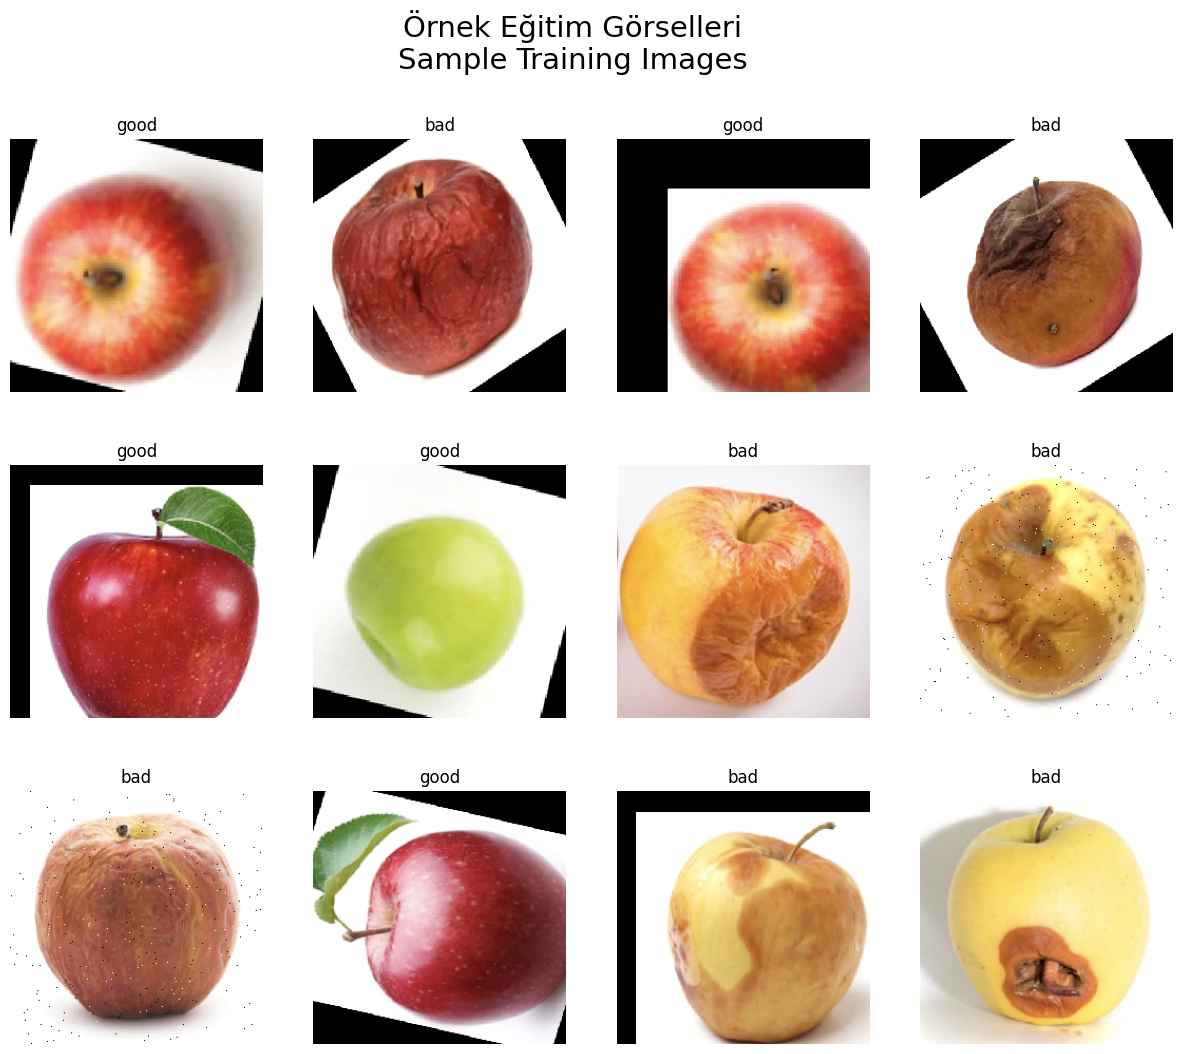

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Örnek Eğitim Görselleri\nSample Training Images", fontsize=21)
plt.show()

### Tr

# Bu kod bloğu, eğitim veri setinden rastgele seçilen 12 örneği görselleştirmek için kullanılır. Şu adımları içerir:

# Bir subplot figürü oluşturulur ve 3 satır, 4 sütunlu bir düzen belirlenir.
# İndeksleme için idx değişkeni tanımlanır.
# İki döngü kullanarak subplotlara yerleştirilecek 12 görsel için iterasyon yapılır.
# Her subplot için etiket belirlenir. Etiket, eğitim veri setindeki örneğin hedef sınıfını temsil eder.
# Subplot'a etiket atanır, örnek görsel görüntülenir, eksenler kapatılır.
# idx değişkeni güncellenir.
# Görselleri içeren subplotlar gösterilir.
# Üst başlık, "Örnek Eğitim Görselleri\nSample Training Images" olarak ayarlanır ve grafik üzerinde görüntülenir.
# Bu kod bloğu, eğitim veri setindeki örneklerin etiketlerini ve görüntülerini kontrol etmek için kullanılır.


### Eng

# This code block is used to visualize 12 randomly selected samples from the training data set. It includes the following steps:

# Create a subplot figure and define a layout with 3 rows and 4 columns.
# Define the variable idx for indexing.
# Iterate for 12 images to be placed in the subplots using two iterations.
# A label is defined for each subplot. The label represents the target class of the sample in the training dataset.
# Label is assigned to the subplot, the sample image is displayed, axes are closed.
# The idx variable is updated.
# Subplots containing the visuals are shown.
# The header is set to "Örnek Eğitim Görselleri\nSample Training Images" and displayed on the chart.
# This code block is used to check the labels and images of the samples in the training data set.

### Modelleme
### Modeling

In [ ]:
# Model oluştur
# Create a model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
target_size = (240, 240)

### Tr

# Bu kod bloğu bir görüntü sınıflandırma modeli oluşturmak için TensorFlow ve Keras kütüphanelerini kullanır. İşlemler şu şekilde gerçekleştirilir:
# Modelin mimarisi oluşturulur: Model, sıralı bir yapıda tanımlanır. İlk katman bir 2D konvolüsyonel katmandır ve 32 filtre kullanır. ReLU aktivasyon fonksiyonu kullanılır. Giriş şekli 240x240 pikseldir. Ardından, maksimum havuzlama (MaxPooling) katmanı gelir. Overfitting'i önlemek için %40 oranında dropout uygulanır. Bu işlem, daha sonra aynı yapıda bir 64 filtreli konvolüsyonel katman, bir MaxPooling katmanı, %40 dropout, bir 128 filtreli konvolüsyonel katman, bir MaxPooling katmanı ve %20 dropout içerir. Daha sonra verileri düzleştirmek için Flatten katmanı eklenir. Ardından, iki tam bağlantılı (Dense) katman eklenir, sırasıyla 128 ve 64 nöron içerir ve ReLU aktivasyon fonksiyonu kullanır. Son olarak, çıktı katmanı olarak 2 nöronlu bir Dense katmanı eklenir ve softmax aktivasyon fonksiyonu kullanılır.
# Model derlenir: Model, adam optimizer ile kategorik çapraz entropi kaybı (categorical_crossentropy) kullanarak derlenir. Doğruluk (accuracy) metriği kullanılır.
# Görüntü boyutu belirlenir: Görüntülerin hedef boyutu 240x240 pikseldir.
# Bu kod bloğu ayrıca veri kümesinin hazırlanması, eğitim ve test veri setlerinin oluşturulması ve bazı örnek görüntülerin gösterilmesi işlemlerini içerir.


### Eng

# This code block uses the TensorFlow and Keras libraries to create an image classification model. The operations are performed as follows:
# The architecture of the model is created: The model is defined in a sequential structure. The first layer is a 2D convolutional layer and uses 32 filters. The ReLU activation function is used. The input shape is 240x240 pixels. Next comes the maximum pooling (MaxPooling) layer. A 40% dropout is applied to avoid overfitting. This process then includes a 64-filter convolutional layer, a MaxPooling layer, 40% dropout, a 128-filter convolutional layer, a MaxPooling layer and 20% dropout in the same structure. A Flatten layer is then added to flatten the data. Next, two fully connected (Dense) layers are added, containing 128 and 64 neurons respectively and using the ReLU activation function. Finally, a Dense layer with 2 neurons is added as the output layer and uses the softmax activation function.
# Model is compiled: The model is compiled with the adam optimizer using categorical_crossentropy loss. The accuracy metric is used.
# Image size is determined: The target size of the images is 240x240 pixels.
# This code block also includes preparing the dataset, creating the training and test datasets and showing some sample images.

In [ ]:
model.summary()

### Tr

# model.summary() kodu, oluşturulan modelin özetini görüntüler. Bu özet, modelin katmanlarını, katmanlar arasındaki boyutları ve modelin toplam parametre sayısını içerir. Özet, modelin yapısını ve öğrenilebilir parametrelerin sayısını hızlı bir şekilde anlamamıza yardımcı olur. Ayrıca, her katmandaki çıktı şeklini, toplam parametre sayısını, eğitilebilir parametre sayısını ve her katmandaki parametre sayısını da görüntüler. Bu bilgiler, modelin karmaşıklığı ve bellek gereksinimleri hakkında bilgi sağlar.


### Eng

# model.summary() displays a summary of the generated model. This summary includes the layers of the model, the dimensions between layers and the total number of parameters of the model. The summary helps us to quickly understand the structure of the model and the number of learnable parameters. It also displays the output shape in each layer, the total number of parameters, the number of trainable parameters and the number of parameters in each layer. This information provides insight into the complexity and memory requirements of the model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0

### Modelin Eğitilmesi
### Training the Model


In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=20,
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset))

### Tr

# history = model.fit(train_dataset,: Modelin eğitimi için train_dataset veri kümesini kullanır. train_dataset, eğitim verilerinin modelin üzerine ayarlandığı bir veri kümesidir.
# steps_per_epoch=len(train_dataset),: Bir epoch boyunca adımların sayısını belirtir. Burada, train_dataset içindeki örneklerin sayısını kullanarak steps_per_epoch değeri belirlenir.
# epochs=20,: Eğitimin kaç epoch süreceğini belirtir. Bir epoch, tüm eğitim verilerinin model tarafından işlenmesini ifade eder.
# validation_data=val_dataset,: Eğitim sırasında modelin performansını değerlendirmek için kullanılan doğrulama veri kümesidir. val_dataset, modelin eğitim verileri dışında başarısını kontrol etmek için kullanılan bir veri kümesidir.
# validation_steps=len(val_dataset)): Doğrulama sırasında adımların sayısını belirtir. Burada, val_dataset içindeki örneklerin sayısını kullanarak validation_steps değeri belirlenir.
# Bu kod parçası, modelin eğitim verilerini kullanarak belirtilen sayıda epoch boyunca eğitilmesini sağlar. Eğitim sırasında modelin performansı doğrulama veri kümesi üzerinde değerlendirilir ve eğitim sürecinin geçmişi history adlı bir değişkene kaydedilir. Bu geçmiş, eğitim ve doğrulama kayıp (loss) ve doğruluk (accuracy) değerlerini içerir.


### Eng

# history = model.fit(train_dataset,: Uses the train_dataset dataset to train the model. train_dataset is a dataset on which the training data is overlaid on the model.
# steps_per_epoch=len(train_dataset),: Specifies the number of steps over an epoch. Here, the value of steps_per_epoch is determined using the number of samples in the train_dataset.
# epochs=20,: Specifies how many epochs the training will take. One epoch means that all training data is processed by the model.
# validation_data=val_dataset,: A validation dataset used to evaluate the model's performance during training. val_dataset is a dataset used to check the model's performance outside of the training data.
# validation_steps=len(val_dataset)): Specifies the number of steps during validation. Here, the validation_steps value is determined using the number of instances in val_dataset.
# This code fragment allows the model to be trained for a specified number of epochs using the training data. During training, the model's performance is evaluated on the validation dataset and the history of the training process is stored in a variable called history. This history contains the training and validation loss and accuracy values.

Epoch 1/20
68/68 [==============================] - 30s 238ms/step - loss: 1.6155 - accuracy: 0.4944 - val_loss: 0.6931 - val_accuracy: 0.5458
Epoch 2/20
68/68 [==============================] - 16s 228ms/step - loss: 0.6798 - accuracy: 0.5806 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/20
68/68 [==============================] - 16s 235ms/step - loss: 0.6568 - accuracy: 0.6204 - val_loss: 0.6534 - val_accuracy: 0.7083
Epoch 4/20
68/68 [==============================] - 15s 225ms/step - loss: 0.5609 - accuracy: 0.7111 - val_loss: 0.5382 - val_accuracy: 0.7708
Epoch 5/20
68/68 [==============================] - 17s 256ms/step - loss: 0.4076 - accuracy: 0.8222 - val_loss: 0.4352 - val_accuracy: 0.8250
Epoch 6/20
68/68 [==============================] - 16s 228ms/step - loss: 0.3053 - accuracy: 0.8755 - val_loss: 0.3973 - val_accuracy: 0.8208
Epoch 7/20
68/68 [==============================] - 17s 242ms/step - loss: 0.2534 - accuracy: 0.9005 - val_loss: 0.6117 - val_accuracy: 0.7167

### Doğruluk ve Kayıp Grafikleri
### Accuracy and Loss Charts

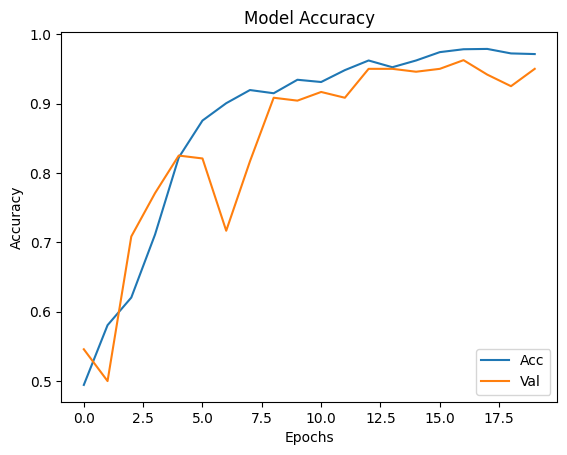

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

### Tr

# Bu kod, eğitim sırasında modelin doğruluk değerlerinin ve doğrulama (validation) doğruluk değerlerinin grafiğini çizmektedir.

# İlk olarak, eğitim sürecinde elde edilen doğruluk değerlerini (accuracy) history.history['accuracy'] ve doğrulama sürecinde elde edilen doğruluk değerlerini (val_accuracy) history.history['val_accuracy'] kullanarak çizgi grafiği çizmek için plt.plot kullanılır.
# plt.title ile grafiğin başlığı belirlenir.
# plt.xlabel ve plt.ylabel ile x ve y eksenlerinin etiketleri belirlenir.
# plt.legend ile grafiğin açıklamaları (Acc ve Val) ve konumu (loc = 'lower right') belirlenir.
# Bu grafik, modelin eğitim sürecindeki performansını değerlendirmek için kullanılabilir. Doğruluk değeri, modelin doğru tahmin ettiği örneklerin oranını gösterir. Eğitim doğruluğu, modelin eğitim veri kümesi üzerindeki performansını, doğrulama doğruluğu ise modelin doğrulama veri kümesi üzerindeki performansını yansıtır. Grafik, eğitim sürecindeki doğruluk değerlerinin zamanla nasıl değiştiğini ve aynı zamanda modelin aşırı uyuma (overfitting) durumunu gözlemlemek için doğrulama doğruluğunu da takip etmemizi sağlar.


### Eng

# This script plots the accuracy values of the model during training and the validation accuracy values.

# First, plt.plot is used to plot the line graph using history.history['accuracy'] for the accuracy values obtained during training and history.history['val_accuracy'] for the accuracy values obtained during validation.
# plt.title is used to set the title of the plot.
# plt.xlabel and plt.ylabel are used to label the x and y axes.
# plt.legend specifies the legend (Acc and Val) and the position (loc = 'lower right') of the plot.
# This graph can be used to evaluate the performance of the model during the training process. The accuracy value shows the proportion of samples that the model predicts correctly. The training accuracy reflects the performance of the model on the training dataset and the validation accuracy reflects the performance of the model on the validation dataset. The graph allows us to track how the accuracy values change over time during the training process and also the validation accuracy to observe the overfitting of the model.

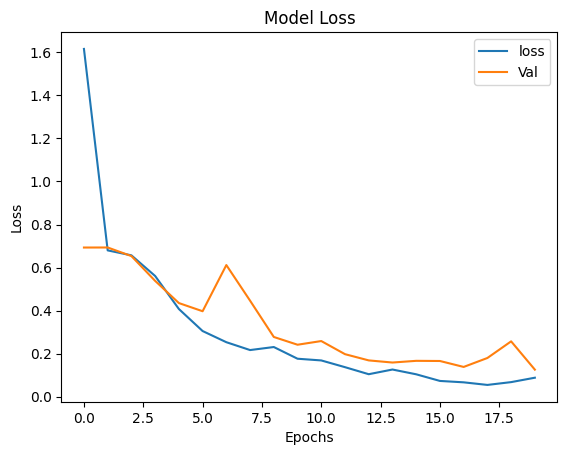

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

### Tr

# Bu kısım, modelin eğitimi sırasında kaydedilen eğitim ve doğrulama (validation) kayıplarını görselleştirmek için kullanılmaktadır.

# plt.plot(history.history['loss']) ve plt.plot(history.history['val_loss']) komutlarıyla eğitim ve doğrulama kayıpları, epoch (eğitim adımı) sayısına göre çizilir. Bu kayıp değerleri, modelin tahminlerinin gerçek etiketlerden ne kadar uzak olduğunu gösterir. Daha düşük kayıp değerleri, modelin daha iyi performans gösterdiğini gösterir.
# plt.title('Model Loss') komutu, grafiğin başlığını "Model Loss" olarak ayarlar.
# plt.xlabel('Epochs') komutu, x-ekseninin adını "Epochs" olarak ayarlar. Epochs, modelin tüm veri setini kaç kez geçtiğini ifade eder.
# plt.ylabel('Loss') komutu, y-ekseninin adını "Loss" olarak ayarlar. Loss, kayıp değerini ifade eder.
# plt.legend(['loss','Val'], loc = 'upper right') komutu, grafiğin hangi çizginin neyi temsil ettiğini gösteren bir açıklama ekler. 'loss' çizgisi eğitim kaybını, 'Val' çizgisi ise doğrulama kaybını temsil eder. loc = 'upper right' ise açıklamanın grafiğin sağ üst köşesinde yer alacağını belirtir.


### Eng

# This section is used to visualize the training and validation losses recorded during the training of the model.

# The plt.plot(history.history['loss']) and plt.plot(history.history['val_loss']) commands plot the training and validation losses by the number of epochs (training steps). These loss values show how far the model's predictions are from the true labels. Lower loss values indicate better performance of the model.
# plt.title('Model Loss') sets the title of the plot to "Model Loss".
# plt.xlabel('Epochs') sets the name of the x-axis to "Epochs". Epochs refers to the number of times the model traverses the entire data set.
# plt.ylabel('Loss') command sets the name of the y-axis to "Loss". Loss refers to the loss value.
# plt.legend(['loss','Val'], loc = 'upper right') adds a legend to the graph indicating which line represents what. The 'loss' line represents the training loss and the 'Val' line represents the validation loss. loc = 'upper right' indicates that the legend will appear in the upper right corner of the graph.

In [ ]:
loss, accuracy = model.evaluate(val_dataset, batch_size=32)
print("\nTest Accuracy: %.1f%%" % (100.0 * accuracy))
print("\nTest Loss: %.1f%%" % (100.0 * loss))

### Tr

# Bu kod, eğitilmiş modelin doğruluk ve kayıp değerlerini değerlendirmek için test veri kümesi üzerinde bir değerlendirme gerçekleştirir. model.evaluate() fonksiyonu kullanılarak, veri kümesindeki görüntülerin doğruluğunu ve kaybını hesaplar.
# val_dataset parametresi, doğrulama veri kümesini temsil eder. Bu veri kümesi, eğitim sırasında kullanılan veri kümesinden ayrılmış bir alt küme olabilir. batch_size parametresi ise her bir değerlendirme adımında kullanılan örnek sayısını belirtir.
# Sonuç olarak, kod, eğitilmiş modelin test veri kümesi üzerindeki performansını değerlendirir ve ekrana doğruluk ve kayıp değerlerini yazdırır.


### Eng

# This script performs an evaluation on the test dataset to assess the accuracy and loss values of the trained model. Using the model.evaluate() function, it calculates the accuracy and loss of the images in the dataset.
# The parameter val_dataset represents the validation dataset. This dataset can be a subset of the dataset used during training. The batch_size parameter specifies the number of samples used in each evaluation step.
# As a result, the script evaluates the performance of the trained model on the test dataset and prints the accuracy and loss values on the screen.

8/8 [==============================] - 2s 226ms/step - loss: 0.1261 - accuracy: 0.9500

Test Accuracy: 95.0%

Test Loss: 12.6%


In [ ]:
# Sınıflandırma Raporu
# Classification Report
x_test, y_test = val_dataset.next()

y_pred = model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_test, axis=1)

y_pred

### Tr

# Bu bölümdeki kod, eğitilmiş bir modelin performansını değerlendirmek için sınıflandırma raporu oluşturur.

# x_test, y_test = val_dataset.next(): Test veri setinden bir veri örneği ve etiketleri alır.
# y_pred = model.predict(x_test): Modeli kullanarak x_test veri örneğini sınıflandırır ve tahminleri elde eder.
# y_pred = np.argmax(y_pred, axis=1): Tahminlerdeki olasılık değerlerinin en yüksek olduğu sınıfı seçer ve tahminlerin sınıf etiketlerini elde eder.
# y_test = np.argmax(y_test, axis=1): Gerçek etiketlerin sınıf etiketlerini elde eder.
# Bu işlemlerden sonra, y_pred ve y_test içerisinde modelin tahminleri ve gerçek etiketler bulunmaktadır. Bu değerler kullanılarak daha sonra sınıflandırma raporu oluşturulabilir.


### Eng

# The code in this section generates a classification report to evaluate the performance of a trained model.

# x_test, y_test = val_dataset.next(): Retrieves a data sample and labels from the test dataset.
# y_pred = model.predict(x_test): Classifies the data sample x_test using the model and obtains predictions.
# y_pred = np.argmax(y_pred, axis=1): Selects the class with the highest probability values in the predictions and obtains the class labels of the predictions.
# y_test = np.argmax(y_test, axis=1): Obtains the class labels of the actual labels.
# After these operations, y_pred and y_test contain the model's predictions and the actual labels. These values can then be used to generate a classification report.

1/1 [==============================] - 0s 215ms/step


array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
target_names = labels

### Tr

# Kodda target_names = labels ifadesi, sınıf adlarını temsil eden bir listeyi target_names değişkenine atamak için kullanılıyor. Bu listeye labels olarak adlandırılan ['good', 'bad'] liste atanıyor. target_names değişkeni, sonuçların sınıf adlarını belirtmek için kullanılabilir. Bu nedenle, sınıflandırma raporunu okurken veya sonuçları yorumlarken sınıf adlarını anlamlı bir şekilde göstermek için kullanılabilir.


### Eng

# In the script, target_names = labels is used to assign a list representing class names to the target_names variable. This list is assigned the list ['good', 'bad'] called labels. target_names can be used to specify the class names of the results. It can therefore be used to show the class names in a meaningful way when reading the classification report or interpreting the results.

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

### Tr
# print(classification_report(y_test, y_pred, target_names=target_names)) satırı, modelin test veri kümesindeki tahminlerine ilişkin sınıflandırma raporunu yazdırmak için kullanılır.
# Sınıflandırma raporu, target_names her sınıf için kesinlik, geri çağırma, F1 puanı ve destek gibi ölçütler sağlar. Hem "good" hem de "bad" elma sınıfları için metrikler de dahil olmak üzere modelin performansının ayrıntılı bir değerlendirmesini verir.
# Sınıf etiketlerinin listesi olarak target_names belirtilirse (labels = ['good', 'bad']), sınıflandırma raporu bu belirli sınıf etiketlerinin metriklerini görüntüler.


### Eng

# The line print(classification_report(y_test, y_pred, target_names=target_names)) is used to print the classification report for the model's predictions on the test dataset.
# The classification report provides metrics such as precision, recall, F1 score and support for each class target_names. It gives a detailed evaluation of the model's performance, including metrics for both "good" and "bad" apple classes.
# If target_names is specified as a list of class labels (labels = ['good', 'bad']), the classification report displays the metrics for these specific class labels.

              precision    recall  f1-score   support

         bad       0.93      1.00      0.96        13
        good       1.00      0.95      0.97        19

    accuracy                           0.97        32
   macro avg       0.96      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [ ]:
# Karışıklık Matrisi
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label', fontweight="bold")
  plt.xlabel('Predict Label', fontweight="bold")

### Tr

# Bu kod, veri kümesi üzerinde eğitilen bir modelin performansını değerlendirmek için kullanılan bir confusion matrix (karmaşıklık matrisi) çizmek için gerekli işlevleri içerir. Confusion matrix, sınıflandırma modelinin gerçek ve tahmin edilen sınıflar arasındaki ilişkiyi gösteren bir tablodur.
# Kod, confusion_matrix fonksiyonunu kullanarak gerçek etiketlerle tahmin edilen etiketler arasındaki karşılaştırmayı yapar ve bu matrisi görselleştirmek için plot_confusion_matrix fonksiyonunu kullanır.
# confusion_matrix fonksiyonu, gerçek etiketlerle tahmin edilen etiketler arasındaki ilişkiyi hesaplar ve bir matris olarak döndürür. Bu matrisin satırları gerçek sınıfları, sütunları ise tahmin edilen sınıfları temsil eder. Her bir hücrede ise gerçek sınıf ile tahmin edilen sınıfın kesiştiği noktadaki örnek sayısı bulunur.
# plot_confusion_matrix fonksiyonu ise confusion matrix'i görselleştirmek için kullanılır. Matrisin değerlerini renklendirerek, etiketlerle birlikte karmaşıklık matrisini görsel olarak sunar. Bu şekilde, modelin hangi sınıfları ne kadar doğru tahmin ettiği ve hangi sınıfları karıştırdığı hakkında bilgi elde edilebilir.


### Eng

# This script contains the necessary functions to draw a confusion matrix, which is used to evaluate the performance of a model trained on the dataset. The confusion matrix is a table showing the relationship between the actual and predicted classes of the classification model.
# The script uses the confusion_matrix function to compare the actual labels with the predicted labels and uses the plot_confusion_matrix function to visualize this matrix.
# The confusion_matrix function calculates the relationship between actual tags and predicted tags and returns it as a matrix. The rows of this matrix represent the actual classes and the columns represent the predicted classes. Each cell contains the number of instances where the true class and the predicted class intersect.
# The function plot_confusion_matrix is used to visualize the confusion matrix. By coloring the values of the matrix, it visually presents the confusion matrix with labels. In this way, information can be obtained about which classes the model predicts correctly and which classes it confuses.

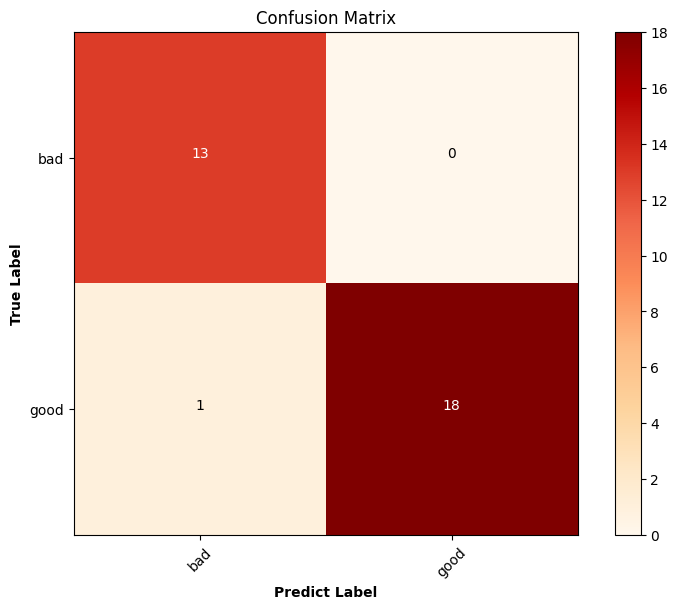

In [ ]:
plot_confusion_matrix(cm, labels,
                      title='Confusion Matrix',
                      cmap=plt.cm.OrRd)

### Tr

# plot_confusion_matrix fonksiyonu, Confusion Matrix'i çizmek için kullanılır. İşlev aşağıdaki parametreleri alır:

# cm: Confusion Matrix verisi, bir numpy dizisi olarak temsil edilir.
# classes: Sınıf etiketlerini içeren bir liste veya dizi.
# normalize: True olarak ayarlandığında, Confusion Matrix'in normalize edilmiş bir versiyonu çizilir. Varsayılan değeri False'dur.
# title: Confusion Matrix'in başlığı.
# cmap: Renk haritası.
# Bu işlev, Confusion Matrix'i çizerek modelin doğruluğunu, yanlış sınıflandırmaları ve sınıflar arasındaki karışıklığı görselleştirir.


### Eng

# plot_confusion_matrix function is used to plot the Confusion Matrix. The function takes the following parameters:

# cm: Confusion Matrix data, represented as a numpy array.
# classes: A list or array containing class labels.
# normalize: When set to True, a normalized version of the Confusion Matrix is drawn. Its default value is False.
# title: The title of the Confusion Matrix.
# cmap: Color map.
# This function visualizes the accuracy of the model, misclassifications and confusion between classes by plotting the Confusion Matrix.

### Modelin Test Edilmesi
### Testing the Model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  batch_size=1,
                                                  target_size=(240,240),
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

### Tr

# Bu kod, modelin test veri kümesi üzerinde performansını değerlendirmek için kullanılır. Öncelikle, test_datagen adında bir görüntü veri artırma nesnesi oluşturulur. Bu nesne, test verilerinin yeniden ölçeklendirilmesi için kullanılır.
# Daha sonra, test_generator adında bir akış üreteci (flow generator) oluşturulur. Bu üreteci, test verilerinin yüksek hacimli işlenmesini optimize eder. test_path parametresi ile belirtilen test veri dizinindeki görüntüler kullanılarak üretilir.
# Son olarak, model.evaluate() yöntemi kullanılarak model test veri kümesi üzerinde değerlendirilir. Bu yöntem, modelin doğruluk (accuracy) ve kayıp (loss) değerlerini hesaplar. steps parametresi, modelin kaç adım üzerinde değerlendirme yapacağını belirtir ve verbose parametresi ile değerlendirme aşamasının çıktısı kontrol edilir.
# Sonuçlar ekrana yazdırılır ve modelin test veri kümesi üzerindeki doğruluğu (accuracy) ve kaybı (loss) elde edilir.



### Eng

# This code is used to evaluate the performance of the model on the test dataset. First, an image data augmentation object called test_datagen is created. This object is used for rescaling the test data.
# Next, a flow generator called test_generator is created. This generator optimizes high-volume processing of test data. It is generated using images from the test data directory specified by the test_path parameter.
# Finally, the model is evaluated on the test dataset using the model.evaluate() method. This method calculates the model's accuracy and loss values. The steps parameter specifies how many steps the model evaluates over, and the verbose parameter controls the output of the evaluation phase.
# The results are printed on the screen and the accuracy and loss of the model on the test dataset are obtained.

Found 1635 images belonging to 2 classes.
1635/1635 [==============================] - 16s 10ms/step - loss: 0.1508 - accuracy: 0.9498
accuracy test:  0.9498471021652222
loss test:  0.15076403319835663


In [ ]:
labels = {0: 'bad', 1: 'good'}

### Tr

# labels = {0: 'bad', 1: 'good'} satırı, sayısal sınıf etiketlerini karşılık gelen dize etiketleriyle eşleyen bir sözlük oluşturur. Bu durumda, 'iyi' etiketini 1 sınıfına ve 'kötü' etiketini 0 sınıfına atar. Bu eşleme, modelin tahminlerini yorumlamak ve sayısal değerler yerine anlamlı sınıf etiketleri içeren bir sınıflandırma raporu veya karışıklık matrisi oluşturmak için kullanışlıdır.


### Eng

# The line labels = {0: 'bad', 1: 'good'} creates a dictionary that maps numeric class labels to their corresponding string labels. In this case, it assigns the label 'good' to class 1 and 'bad' to class 0. This mapping is useful for interpreting the model's predictions and generating a classification report or confusion matrix with meaningful class labels instead of numeric values.

In [ ]:
def model_testing(path):
    """
    Görsellerin bulunduğu dizindeki görüntüyü okuyup model aracılığı ile hangi sınıfa ait olduğuna dair tahmin işlemi gerçekleştirilir.
    
    Parametreler:
    
    path: Görsellerin bulunduğu dizini ifade eder.
    
    Return:
    
    img: Görüntü
    
    p: Tahmin olasılıkları
    
    predicted_class: Tahmin sınıfı
    
    """
    
    img = image.load_img(path, target_size=(240, 240))  #### Tr  # Boyutu (240, 240) olarak ayarlayın   #### Eng  # Set the size to (240, 240)
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img) / 255.0
    p = model.predict(img.reshape(1, 240, 240, 3))  ### Tr  # Boyutu (240, 240) olarak ayarlayın   ### Eng  # Boyutu (240, 240) olarak ayarlayın
    predicted_class = np.argmax(p[0])
    
    return img, p, predicted_class

1/1 [==============================] - 0s 18ms/step


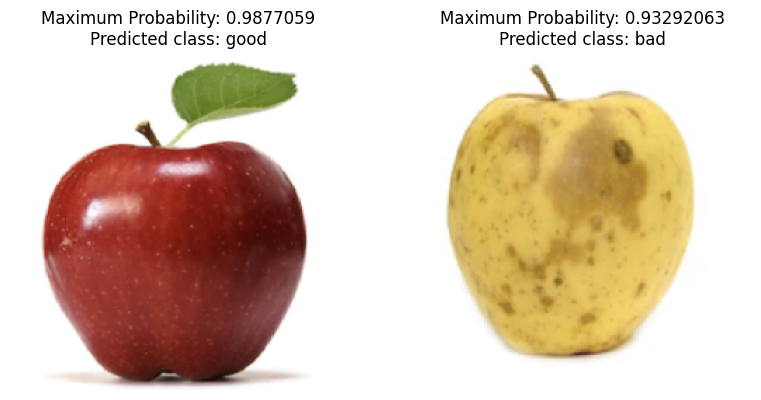

In [ ]:
img1, p1, predicted_class1 = model_testing('/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/fresh_apple/Screen Shot 2018-06-08 at 5.00.35 PM.png')
img2, p2, predicted_class2 = model_testing('/content/drive/MyDrive/Apples_Quality_Detection_and_Classification/rotten_apple/Screen Shot 2018-06-07 at 2.50.09 PM.png')

plt.figure(figsize=(20,60))

plt.subplot(141)
plt.axis('off')
plt.imshow(img1.squeeze())
plt.title("Maximum Probability: " + str(np.max(p1[0], axis = 0)) + "\n" + "Predicted class: " + str(labels[predicted_class1]))
plt.imshow(img1);

plt.subplot(142)
plt.axis('off')
plt.imshow(img2.squeeze())
plt.title("Maximum Probability: " + str(np.max(p2[0], axis = 0)) + "\n" + "Predicted class: " + str(labels[predicted_class2]))
plt.imshow(img2);

### Tr

# Bu kod, eğitilmiş bir meyve sınıflandırma modelini kullanarak verilen görüntülerin sınıflarını tahmin etmek için kullanılır.
# İlk olarak, model_testing fonksiyonu tanımlanır. Bu fonksiyon, belirtilen görüntünün yolunu alır, görüntüyü yükler, model üzerinden tahmin yapar ve tahmin edilen sınıfı döndürür.
# Daha sonra, model_testing fonksiyonu kullanılarak iki farklı görüntünün (bir tane taze elma ve bir tane çürük elma) sınıf tahminleri yapılır.
# Son olarak, tahmin sonuçları ve görüntüler çıktı olarak gösterilir. Her görüntü için en yüksek olasılığa sahip sınıf adı ve tahmin edilen sınıf gösterilir.


### Eng

# This script is used to predict the classes of given images using a trained fruit classification model.
# First, the model_testing function is defined. This function takes the path to the given image, loads the image, predicts over the model and returns the predicted class.
# Next, the model_testing function is used to predict the class of two different images (one fresh apple and one rotten apple).
# Finally, the prediction results and the images are shown as output. For each image, the class name with the highest probability and the predicted class are shown.